<a href="https://colab.research.google.com/github/stokljos/Project-2/blob/master/450_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytz
import datetime
import time
import requests

Getting information from both sites

In [0]:
username = 'OOIAPI-UNTK6F15Z7GIUF'
token = 'TEMP-TOKEN-U4MA2JY0IQGVJK'
url = ["https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE02SHSM/SBD11/06-METBKA000/telemetered/metbk_hourly?beginDT=2019-01-01T00:00:00.000Z&endDT=2020-01-01T00:00:00.000Z&limit=1000&parameters=3076,3092,3074",  "https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE04OSSM/SBD11/06-METBKA000/telemetered/metbk_hourly?beginDT=2019-01-01T00:00:00.000Z&endDT=2020-01-01T00:00:00.000Z&limit=1000&parameters=3076,3092,3074"]

Converting the timestamp to local time

In [0]:
ntp = datetime.datetime(1900, 1, 1)
unix = datetime.datetime(1970, 1, 1)
total = (unix - ntp).total_seconds()
pst_delta = 8*3600

def ntp_seconds_to_datetime(seconds):
    timestamp = datetime.datetime.utcfromtimestamp(seconds - total).replace(microsecond=0)
    universal = pytz.timezone('UTC')
    pacific = pytz.timezone('US/Pacific')
    time = universal.localize(timestamp).astimezone(pacific)
    return time

Requesting the data and Putting them into corrosponding lists

In [0]:
windOSSM = []
precipOSSM = []
timeOSSM = []
windOOSM = []
precipOOSM = []
timeOOSM = []
for i in range(0,len(url)):
  req = requests.get(url[i], auth=(username, token))
  data = req.json()
  
  for j in range(0,len(data)):
    if i == 0:
      windOSSM.append(data[j]["met_wind10m"])
      precipOSSM.append(data[j]['met_rainrte'])
      timeOSSM.append(ntp_seconds_to_datetime(data[j]['met_timeflx']))
    elif i == 1:
      windOOSM.append(data[j]['met_wind10m'])
      precipOOSM.append(data[j]['met_rainrte'])
      timeOOSM.append(ntp_seconds_to_datetime(data[j]['met_timeflx']))


Changing lists into an array and replacing NaN with zeros

In [0]:
windOSSM = np.asarray(windOSSM)
nan = np.isnan(windOSSM)
windOSSM[nan] = 0

windOOSM = np.asarray(windOOSM)
nan1 = np.isnan(windOOSM)
windOOSM[nan1] = 0

precipOSSM = np.asarray(precipOSSM)
nan2 = np.isnan(precipOSSM)
precipOSSM[nan2] = 0

precipOOSM = np.asarray(precipOOSM)
nan3 = np.isnan(precipOOSM)
precipOOSM[nan3] = 0

Plotting wind velocity and rain rate for OSSM

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


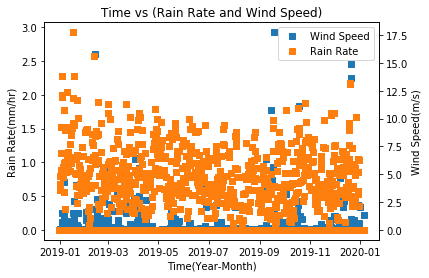

In [6]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Time(Year-Month)')
ax1.set_ylabel('Rain Rate(mm/hr)')
ax1.plot(timeOSSM, precipOSSM, 's', label = 'Rain Rate')

ax2 = ax1.twinx()

ax2.plot(timeOSSM, windOSSM, 's', label = 'Wind Speed')
ax2.set_xlabel('Time(Year-Month)')
ax2.set_ylabel('Wind Speed(m/s)')
ax2.plot(timeOSSM, windOSSM, 's', label = 'Rain Rate')
plt.title('Time vs (Rain Rate and Wind Speed)')
plt.legend()
plt.show()


Plotting wind velocity and rain rate at OOSM

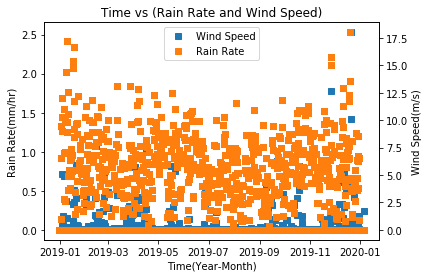

In [7]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Time(Year-Month)')
ax1.set_ylabel('Rain Rate(mm/hr)')
ax1.plot(timeOOSM, precipOOSM, 's', label = 'Rain Rate')

ax2 = ax1.twinx()

ax2.plot(timeOOSM, windOOSM, 's', label = 'Wind Speed')
ax2.set_xlabel('Time(Year-Month)')
ax2.set_ylabel('Wind Speed(m/s)')
ax2.plot(timeOOSM, windOOSM, 's', label = 'Rain Rate')
plt.title('Time vs (Rain Rate and Wind Speed)')
plt.legend()
plt.show()

Plotting when it is windy and rainy, rainy but not windy, windy but not rainy and no wind and no rain for OSSM

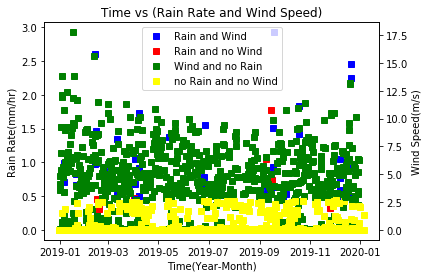

In [8]:
timeOSSM1 =[]
timeOSSM2 =[]
timeOSSM3 =[]
timeOSSM4 =[]

windOSSM1 = []
windOSSM2 = []
windOSSM3 = []
windOSSM4 = []

precipOSSM1 = []
precipOSSM2 = []
precipOSSM3 = []
precipOSSM4 = []

for i in range(len(timeOSSM)):
#windy and rainy
  if windOSSM[i] > 0.15*np.nanmax(windOSSM) and precipOSSM[i] > 0.15*np.nanmax(precipOSSM):
    timeOSSM1.append(timeOSSM[i])
    windOSSM1.append(windOSSM[i])
    precipOSSM1.append(precipOSSM[i])
#rainy but not windy
  elif windOSSM[i] < 0.15*np.nanmax(windOSSM) and precipOSSM[i] > 0.15*np.nanmax(precipOSSM):
    timeOSSM2.append(timeOSSM[i])
    windOSSM2.append(windOSSM[i])
    precipOSSM2.append(precipOSSM[i])
#windy but not rainy
  elif windOSSM[i] > 0.15*np.nanmax(windOSSM) and precipOSSM[i] < 0.15*np.nanmax(precipOSSM):
    timeOSSM3.append(timeOSSM[i])
    windOSSM3.append(windOSSM[i])
    precipOSSM3.append(precipOSSM[i])
#no wind and no rain
  else:
    timeOSSM4.append(timeOSSM[i])
    windOSSM4.append(windOSSM[i])
    precipOSSM4.append(precipOSSM[i])

fig, ax1 = plt.subplots()
ax1.set_xlabel('Time(Year-Month)')
ax1.set_ylabel('Rain Rate(mm/hr)')
ax1.plot(timeOSSM1, precipOSSM1, 's', color = 'blue', label = 'Rain and Wind')
ax1.plot(timeOSSM2, precipOSSM2, 's', color = 'red', label = 'Rain and no Wind')
ax1.plot(timeOSSM3, precipOSSM3, 's', color = 'green', label = 'Wind and no Rain')
ax1.plot(timeOSSM4, precipOSSM4, 's', color = 'yellow', label = 'no Rain and no Wind')

ax2 = ax1.twinx()
ax2.plot(timeOSSM1, windOSSM1, 's', color = 'blue', label = 'Rain and Wind')
ax2.plot(timeOSSM2, windOSSM2, 's', color = 'red', label = 'Rain and no Wind')
ax2.plot(timeOSSM3, windOSSM3, 's', color = 'green', label = 'Wind and no Rain')
ax2.plot(timeOSSM4, windOSSM4, 's', color = 'yellow', label = 'no Rain and no Wind')
ax2.set_xlabel('Time(Year-Month)')
ax2.set_ylabel('Wind Speed(m/s)')
plt.title('Time vs (Rain Rate and Wind Speed)')
plt.legend()
plt.show()

Plotting when it is windy and rainy, rainy but not windy, windy but not rainy and no wind and no rain for OOSM

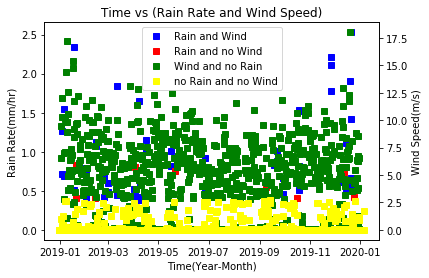

In [9]:
timeOOSM1 =[]
timeOOSM2 =[]
timeOOSM3 =[]
timeOOSM4 =[]

windOOSM1 = []
windOOSM2 = []
windOOSM3 = []
windOOSM4 = []

precipOOSM1 = []
precipOOSM2 = []
precipOOSM3 = []
precipOOSM4 = []

for i in range(len(timeOOSM)):
#windy and rainy
  if windOOSM[i] > 0.15*np.nanmax(windOOSM) and precipOOSM[i] > 0.15*np.nanmax(precipOOSM):
    timeOOSM1.append(timeOOSM[i])
    windOOSM1.append(windOOSM[i])
    precipOOSM1.append(precipOOSM[i])
#rainy but not windy
  elif windOOSM[i] < 0.15*np.nanmax(windOOSM) and precipOOSM[i] > 0.15*np.nanmax(precipOOSM):
    timeOOSM2.append(timeOOSM[i])
    windOOSM2.append(windOOSM[i])
    precipOOSM2.append(precipOOSM[i])
#windy but not rainy
  elif windOOSM[i] > 0.15*np.nanmax(windOOSM) and precipOOSM[i] < 0.15*np.nanmax(precipOOSM):
    timeOOSM3.append(timeOOSM[i])
    windOOSM3.append(windOOSM[i])
    precipOOSM3.append(precipOOSM[i])
#no wind and no rain
  else:
    timeOOSM4.append(timeOOSM[i])
    windOOSM4.append(windOOSM[i])
    precipOOSM4.append(precipOOSM[i])

fig, ax1 = plt.subplots()
ax1.set_xlabel('Time(Year-Month)')
ax1.set_ylabel('Rain Rate(mm/hr)')
ax1.plot(timeOOSM1, precipOOSM1, 's', color = 'blue', label = 'Rain and Wind')
ax1.plot(timeOOSM2, precipOOSM2, 's', color = 'red', label = 'Rain and no Wind')
ax1.plot(timeOOSM3, precipOOSM3, 's', color = 'green', label = 'Wind and no Rain')
ax1.plot(timeOOSM4, precipOOSM4, 's', color = 'yellow', label = 'no Rain and no Wind')

ax2 = ax1.twinx()
ax2.plot(timeOOSM1, windOOSM1, 's', color = 'blue', label = 'Rain and Wind')
ax2.plot(timeOOSM2, windOOSM2, 's', color = 'red', label = 'Rain and no Wind')
ax2.plot(timeOOSM3, windOOSM3, 's', color = 'green', label = 'Wind and no Rain')
ax2.plot(timeOOSM4, windOOSM4, 's', color = 'yellow', label = 'no Rain and no Wind')
ax2.set_xlabel('Time(Year-Month)')
ax2.set_ylabel('Wind Speed(m/s)')
plt.title('Time vs (Rain Rate and Wind Speed)')
plt.legend()
plt.show()

Plotting Cross Correlation for wind velocity at both sites

Text(0.5, 1.0, 'Correlation vs Lag for Wind Speed')

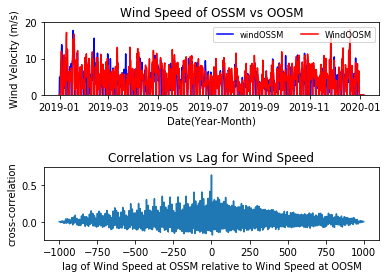

In [10]:
lags = np.arange(-len(windOSSM) + 1, len(windOSSM))
ccov = np.correlate(windOSSM - windOSSM.mean(), windOOSM - windOOSM.mean(), mode='full')
ccor = ccov / (len(windOSSM) * windOSSM.std() * windOOSM.std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=1)
ax = axs[0]
ax.plot(timeOSSM, windOSSM, 'b', label='windOSSM')
ax.plot(timeOOSM, windOOSM, 'r', label='WindOOSM')
ax.set_ylabel('Wind Velocity (m/s)')
ax.set_xlabel('Date(Year-Month)')
ax.set_title('Wind Speed of OSSM vs OOSM')
ax.set_ylim(0, 20)
ax.legend(loc='upper right', fontsize='small', ncol=2)

ax = axs[1]
ax.plot(lags, ccor)
ax.set_ylim(-.25, .75)
ax.set_ylabel('cross-correlation')
ax.set_xlabel('lag of Wind Speed at OSSM relative to Wind Speed at OOSM')
ax.set_title('Correlation vs Lag for Wind Speed')


Plotting Cross Correlation for Rain rate at both sites

Text(0.5, 1.0, 'Correlation vs Lag for Rain Rate')

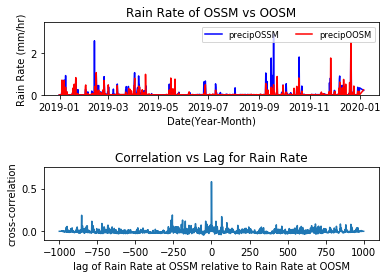

In [11]:
lags = np.arange(-len(precipOSSM) + 1, len(precipOSSM))
ccov = np.correlate(precipOSSM - precipOSSM.mean(), precipOOSM - precipOOSM.mean(), mode='full')
ccor = ccov / (len(precipOSSM) * precipOSSM.std() * precipOOSM.std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=1)
ax = axs[0]
ax.plot(timeOSSM, precipOSSM, 'b', label='precipOSSM')
ax.plot(timeOOSM, precipOOSM, 'r', label='precipOOSM')
ax.set_ylabel('Rain Rate (mm/hr)')
ax.set_xlabel('Date(Year-Month)')
ax.set_title('Rain Rate of OSSM vs OOSM')
ax.set_ylim(0, 3.5)
ax.legend(loc='upper right', fontsize='small', ncol=2)

ax = axs[1]
ax.plot(lags, ccor)
ax.set_ylim(-.1, .75)
ax.set_ylabel('cross-correlation')
ax.set_xlabel('lag of Rain Rate at OSSM relative to Rain Rate at OOSM')
ax.set_title('Correlation vs Lag for Rain Rate')

